* customerID: número de identificação único de cada cliente
* Churn: se o cliente deixou ou não a empresa
* gender: gênero (masculino e feminino)
* SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* Partner: se o cliente possui ou não um parceiro ou parceira
* Dependents: se o cliente possui ou não dependentes
* tenure: meses de contrato do cliente
* PhoneService: assinatura de serviço telefônico
* MultipleLines: assisnatura de mais de uma linha de telefone
* InternetService: assinatura de um provedor internet
* OnlineSecurity: assinatura adicional de segurança online
* OnlineBackup: assinatura adicional de backup online
* DeviceProtection: assinatura adicional de proteção no dispositivo
* TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
* StreamingTV: assinatura de TV a cabo
* StreamingMovies: assinatura de streaming de filmes
* Contract: tipo de contrato
* PaperlessBilling: se o cliente prefere receber online a fatura
* PaymentMethod: forma de pagamento
* Charges.Monthly: total de todos os serviços do cliente por mês
* Charges.Total: total gasto pelo cliente

1. Demográficas / Cadastro
gender, age, contract_type, tenure, payment_method, etc.

📊 O que analisar:

Comparar a taxa de churn por gênero, tipo de contrato, tempo de permanência (tenure).

Pergunta exemplo: clientes com contratos mensais cancelam mais?

2. Comportamento / Uso
total_bytes, rx_bytes, tx_bytes, average_latency, downtime, etc.

📊 O que analisar:

Correlação entre uso de dados e churn.

Clientes com picos de lentidão ou mais downtime tendem a sair?

Criação de variáveis derivadas, como:

Média de uso por dia

Variação do uso (consumo irregular)

% de downtime no total de tempo ativo

3. Engajamento
Se houver: número de chamadas ao suporte, notas de satisfação, reclamações, etc.

📊 O que analisar:

Clientes que ligaram mais para o suporte cancelaram mais?

Insatisfação prévia pode indicar churn iminente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados1=pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json')

In [41]:
dados2= pd.json_normalize(dados1.to_dict(orient='records'))
dados2.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
dados2.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [5]:
dados2.describe(include='O')

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [6]:
dados2.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
dados2=dados2.drop(columns='customerID')
dados2.head(2)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [9]:
index_total=dados2[dados2['account.Charges.Total']==' '].index
dados2=dados2.drop(index=index_total)

In [10]:
dados2['account.Charges.Total']= dados2['account.Charges.Total'].astype(float)

In [11]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   object 
 1   customer.gender            7256 non-null   object 
 2   customer.SeniorCitizen     7256 non-null   int64  
 3   customer.Partner           7256 non-null   object 
 4   customer.Dependents        7256 non-null   object 
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   object 
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  internet.StreamingTV       7256 non-null   object 
 1

In [12]:
dados2['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [13]:
index_remover=dados2[ dados2['Churn']==''].index

In [14]:
dados2=dados2.drop(index=index_remover)

In [15]:
dados2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
dados2.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Comparar a taxa de churn por gênero, tipo de contrato, tempo de permanência (tenure).

Pergunta exemplo: clientes com contratos mensais cancelam mais?

In [17]:
lista2=['internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies']
dados2['numero_serviços'] = dados2[lista2].apply(lambda row: sum(valor == 'Yes' for valor in row), axis=1)

In [18]:
dados2.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,numero_serviços
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,4
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2


In [19]:
churn_por_genero=dados2.groupby('customer.gender')['Churn'].value_counts().unstack()

In [20]:
churn_por_genero

Churn,No,Yes
customer.gender,,
Female,2544,939
Male,2619,930


<Axes: xlabel='customer.gender'>

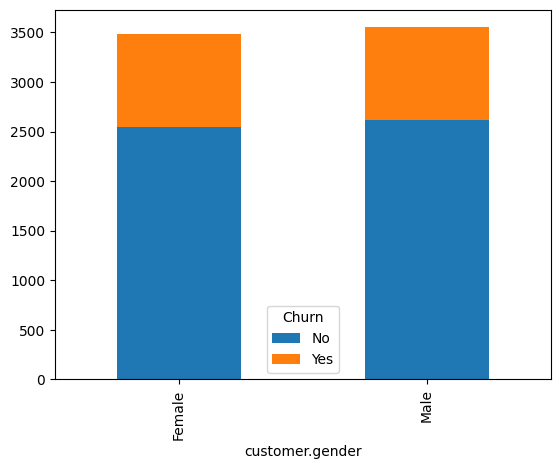

In [21]:
churn_por_genero.plot(kind='bar',stacked=True)

In [22]:
tipo_de_contrato=dados2.groupby('account.Contract')['Churn'].value_counts().unstack()

<Axes: xlabel='account.Contract'>

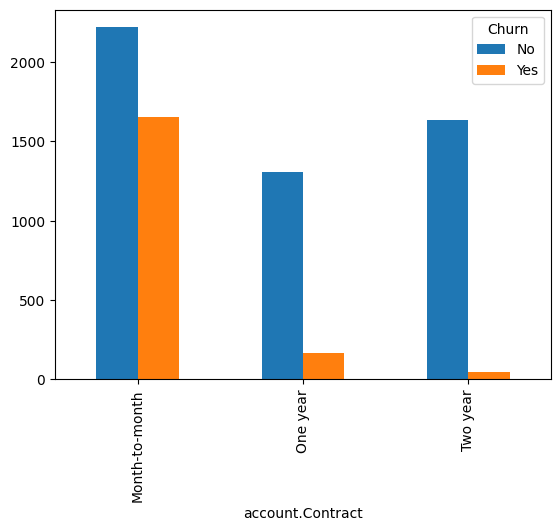

In [23]:
tipo_de_contrato.plot(kind='bar')

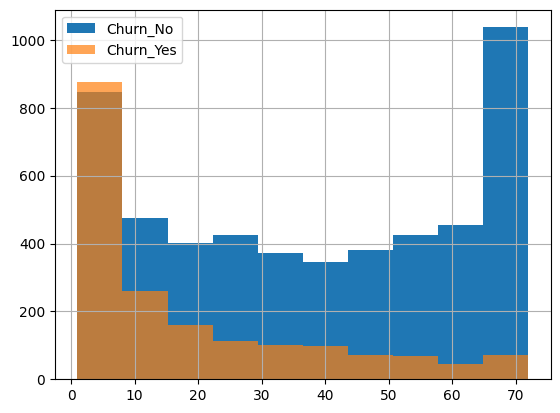

In [24]:
dados2[dados2['Churn']=='No']['customer.tenure'].hist(label='Churn_No')
dados2[dados2['Churn']=='Yes']['customer.tenure'].hist(label='Churn_Yes', alpha=0.7)
plt.legend();

In [25]:
dados2.groupby('account.Contract')['customer.tenure'].mean()

,customer.tenure
account.Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


In [26]:
dados2.groupby('Churn')['internet.TechSupport'].value_counts().unstack()

internet.TechSupport,No,No internet service,Yes
Churn,,,
No,2026,1407,1730
Yes,1446,113,310


<Axes: xlabel='Churn'>

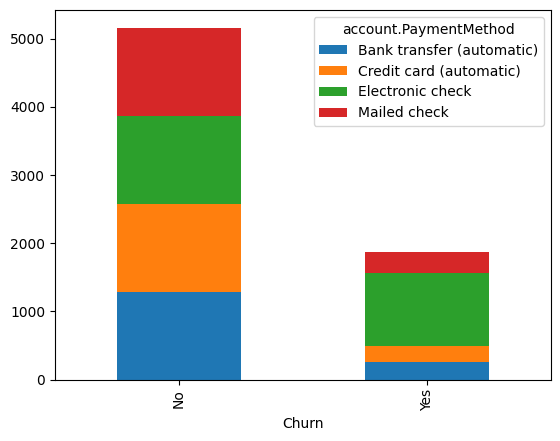

In [27]:
dados2.groupby('Churn')['account.PaymentMethod'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

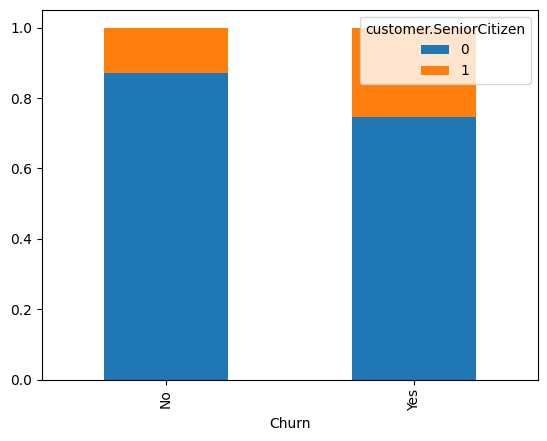

In [28]:
dados2.groupby('Churn')['customer.SeniorCitizen'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

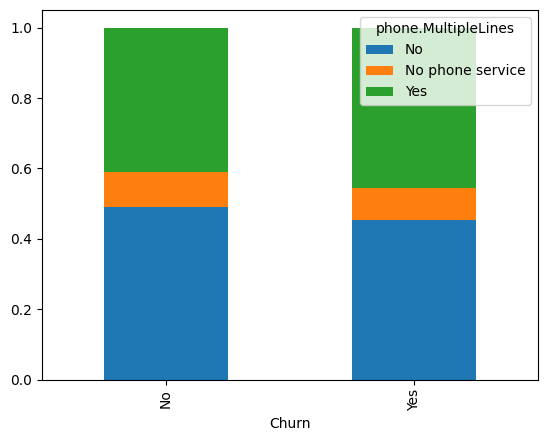

In [29]:
dados2.groupby('Churn')['phone.MultipleLines'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [30]:
import numpy as np

In [31]:
dados2.groupby('Churn')['account.Charges.Total'].agg(mean='mean', max='max', min='min')

,mean,max,min
Churn,,,
No,2555.344141,8672.45,18.80
Yes,1531.796094,8684.80,18.85


In [32]:
dados2.groupby('Churn')['customer.Partner'].value_counts().unstack()

customer.Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


In [33]:
dados2.groupby('Churn')['customer.Dependents'].value_counts().unstack()

customer.Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


In [34]:
dados2.groupby('Churn')['account.PaperlessBilling'].value_counts().unstack()

account.PaperlessBilling,No,Yes
Churn,,
No,2395,2768
Yes,469,1400


In [35]:
dados2.groupby('Churn')['numero_serviços'].mean()

,numero_serviços
Churn,
No,2.135774
Yes,1.768325


In [36]:
dados2.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'numero_serviços'],
      dtype='object')

In [37]:
dados2.groupby('Churn')['internet.OnlineSecurity'].value_counts().unstack()

internet.OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2036,1407,1720
Yes,1461,113,295


In [38]:
dados2.groupby('Churn')['internet.OnlineBackup'].value_counts().unstack()

internet.OnlineBackup,No,No internet service,Yes
Churn,,,
No,1854,1407,1902
Yes,1233,113,523


In [39]:
dados2.groupby('Churn')['internet.StreamingMovies'].value_counts().unstack()

internet.StreamingMovies,No,No internet service,Yes
Churn,,,
No,1843,1407,1913
Yes,938,113,818


**Relatório:**

   **Análise dos Fatores de Cancelamento**
1. **Contrato Mensal: Principal Indicador de Evasão**

   A maioria dos clientes que cancelam possui contrato do tipo "mês a mês".

   Este tipo de contrato, por ser mais flexível, tende a atrair clientes menos comprometidos no longo prazo.

2. **Baixa Fidelização nos Primeiros Meses**

   O histograma de tempo de permanência mostra que muitos clientes saem antes de completar 10 meses.

   Isso indica que a experiência inicial e o onboarding são pontos críticos.

3. **Ausência de Serviços Adicionais**

  Clientes que não contratam suporte técnico, backup, segurança online, nem streaming, apresentam maior taxa de evasão.

  Isso indica menor envolvimento com a empresa e menor percepção de valor agregado.

4. **Método de Pagamento: "Electronic Check"**

  Esse método de pagamento é disproporcionalmente mais comum entre os clientes que saem.

  Pode indicar um perfil de cliente mais sensível a preço ou com menor facilidade para pagamentos digitais modernos.

5. **Perfil do Cliente**

  Clientes que saem costumam:

* Não ter parceiro ou dependentes

* Consumir menos serviços

* Gastar menos por mês

  Esse grupo tende a ser mais volátil e menos fidelizado.

6. **Gênero e Idade Não Influenciam**

  As variáveis de gênero e idade não mostraram relação estatística com a evasão, sendo neutras no comportamento de saída.

7. **Sugestões para Redução da Evasão**

* Incentivar Contratos Anuais com Benefícios

* Oferecer descontos, bônus exclusivos ou meses gratuitos para quem optar por planos anuais.

* Facilitar a migração de contrato mensal para anual com benefícios imediatos pode ajudar.

* Melhorar a Jornada Inicial do Cliente

* Desenvolver um programa de onboarding nos primeiros 3 meses, incluindo:

* Suporte proativo

* Tutoriais sobre como usar serviços adicionais

* Atendimento personalizado

* Oferecer Pacotes Personalizados de Serviços Adicionais

* Criar combos acessíveis com backup + segurança + streaming.

* Mostrar claramente o valor e os benefícios desses extras pode aumentar a retenção.

* Rever Estratégia de Pagamento

* Oferecer incentivos (como cashback) para quem muda do "Electronic Check" para cartão de crédito ou débito automático.

* Avaliar se clientes com este método têm dificuldades de pagamento ou se o modelo atrai um perfil menos estável.

* Campanhas Focadas em Clientes com Baixo Engajamento

  Detectar clientes com uso mínimo de serviços e enviar:

* Ofertas de upgrade

* Conteúdo personalizado com sugestões de uso

* Alertas de vantagens não utilizadas

* Criação de um Programa de Fidelidade

* Recompensar o tempo de permanência com:

* Pontos por mês ativo

* Prêmios por uso de serviços extras

* Convites para planos exclusivos

8. **Conclusão**

   A retenção de clientes está diretamente ligada ao tipo de contrato, à adesão a serviços adicionais e ao perfil de engajamento. Investir em estratégias que aumentem o valor percebido nos primeiros meses, estimular contratos mais longos e personalizar os pacotes de serviços pode reduzir consideravelmente a evasão.




